# 2 ESSAY LOGISTIK REGRESI 

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

advertising = pd.read_csv("testcpns.csv")
advertising

,toefl,ipk,pengalaman_kerja,diterima
0,780,4.00,3,1
1,750,3.09,4,1
2,690,3.03,3,0
3,710,3.07,5,1
4,680,3.09,4,0
5,730,3.07,6,1
6,690,2.03,1,0
7,720,3.03,4,1
8,740,3.03,5,1
9,690,1.07,1,0


In [9]:
advertising.describe()

,toefl,ipk,pengalaman_kerja,diterima
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,2.694500,3.425000,0.475000
std,61.427464,0.653899,1.737778,0.505736
min,540.000000,1.070000,1.000000,0.000000
25%,607.500000,2.070000,2.000000,0.000000
50%,660.000000,3.030000,4.000000,0.000000
75%,690.000000,3.070000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


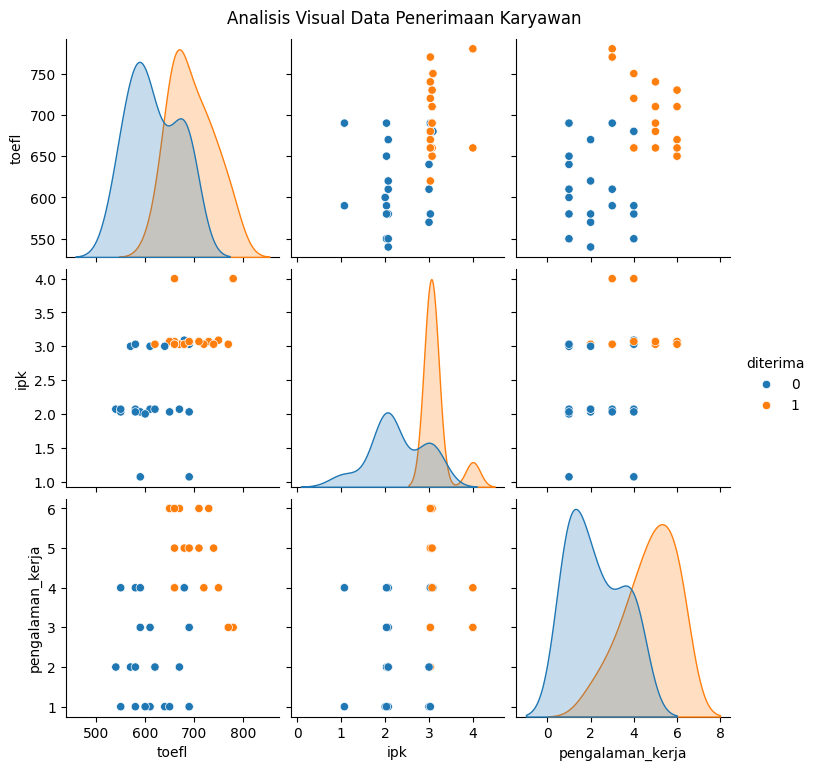

In [10]:
# Scatter plot antar variabel numerik dengan hue diterima
sns.pairplot(advertising, hue='diterima')
plt.suptitle("Analisis Visual Data Penerimaan Karyawan", y=1.02)
plt.show()


### Analisa Singkat dari Visualisasi Seaborn

Berdasarkan plot hasil visualisasi menggunakan `Seaborn`, berikut adalah beberapa kesimpulan yang dapat diambil:

#### Distribusi TOEFL:
- Nilai TOEFL untuk kandidat **yang diterima** (warna oranye) umumnya lebih tinggi.
- Sebagian besar pelamar **diterima memiliki TOEFL di atas 650**.

#### Distribusi IPK:
- Kandidat yang diterima **cenderung memiliki IPK ≥ 3.0**.
- Kandidat yang **tidak diterima** (warna biru) banyak berada di IPK rendah **(di bawah 2.75)**.

#### Distribusi Pengalaman Kerja:
- Mayoritas pelamar yang diterima memiliki **pengalaman kerja 3–6 tahun**.
- Sementara yang **tidak diterima** umumnya memiliki pengalaman kerja **1–2 tahun**.

#### Kombinasi antar Variabel:
- Scatter antar `toefl vs ipk`, dan `toefl vs pengalaman_kerja` menunjukkan bahwa **kandidat yang diterima berada di sisi kanan dan atas grafik**.
- Artinya, **nilai TOEFL, IPK tinggi, dan pengalaman kerja yang cukup** sangat berpengaruh terhadap peluang diterima.

---

**Kesimpulan:**  
> Visualisasi ini menunjukkan bahwa nilai TOEFL dan IPK yang tinggi serta pengalaman kerja yang cukup menjadi indikator penting dalam seleksi penerimaan karyawan di perusahaan ini.


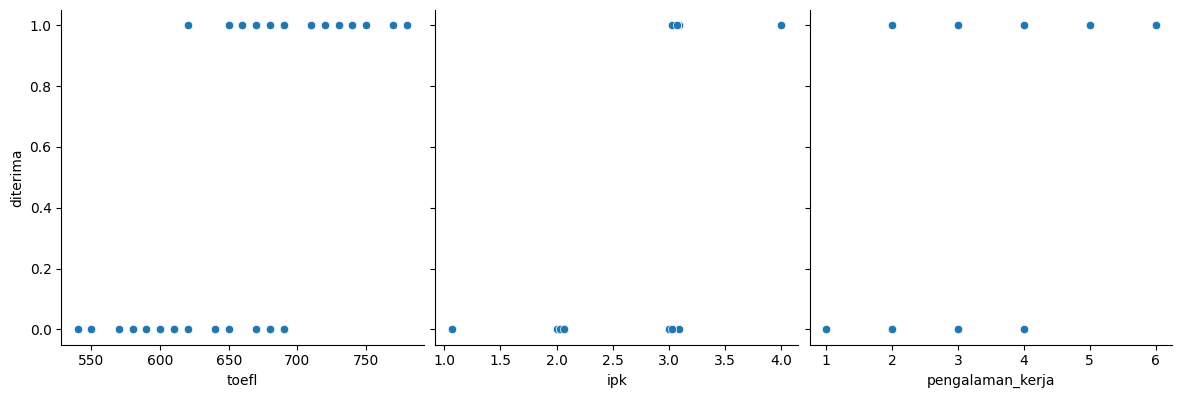

In [11]:
# Visualisasi scatter plot antar variabel input dan variabel target 'diterima'
sns.pairplot(advertising,
             x_vars=['toefl', 'ipk', 'pengalaman_kerja'],
             y_vars='diterima',
             height=4,
             aspect=1,
             kind='scatter')

plt.show()

<Figure size 600x500 with 0 Axes>

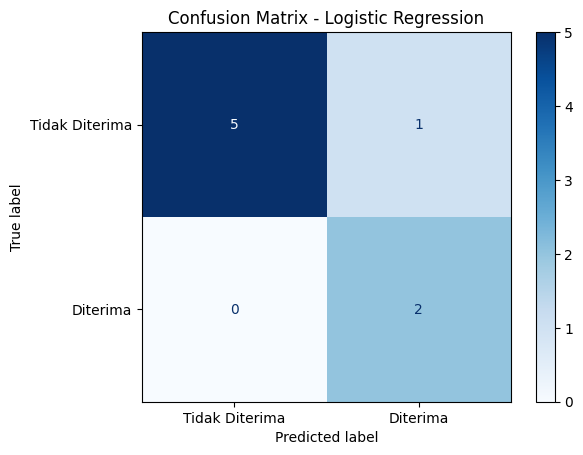

=== Classification Report ===
                precision    recall  f1-score   support

Tidak Diterima       1.00      0.83      0.91         6
      Diterima       0.67      1.00      0.80         2

      accuracy                           0.88         8
     macro avg       0.83      0.92      0.85         8
  weighted avg       0.92      0.88      0.88         8



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report
)

# Load data
df = pd.read_csv('testcpns.csv')

# Fitur dan target
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Latih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Diterima", "Diterima"])

# Tampilkan plot
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Tampilkan evaluasi lengkap
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Tidak Diterima", "Diterima"]))


In [13]:
# Ambil baris sesuai index dari soal
subset = df.loc[subset_index]

# Tampilkan subset sebagai tabel
print("Data Penerimaan kerja")
print(subset.to_string(index=False))


Data Penerimaan kerja
 toefl  ipk  pengalaman_kerja  diterima
   550 2.03                 4         0
   620 3.03                 2         1
   670 3.03                 6         1
   680 3.09                 4         0
   610 2.07                 3         0
   610 3.00                 1         0
   650 3.07                 6         1
   690 3.07                 5         1
   650 3.07                 6         1
   660 3.03                 5         1
   580 2.03                 2         0
   650 2.03                 1         0


Analisis Data Penerimaan Kerja

## 1. Pelamar dengan TOEFL Tinggi & IPK Bagus Lebih Banyak Diterima

Pelamar yang memiliki nilai **TOEFL tinggi** dan **IPK yang bagus** cenderung lebih sering **diterima**.

**Contoh:**

- TOEFL **670**, IPK **3.03**, pengalaman kerja **6 tahun** → **Diterima**  
- TOEFL **690**, IPK **3.07**, pengalaman kerja **5 tahun** → **Diterima**

**Kesimpulan:** Perusahaan menghargai kemampuan bahasa Inggris dan prestasi akademik yang baik.


## 2. TOEFL Tinggi Saja Tidak Cukup

Memiliki nilai TOEFL tinggi **tidak otomatis** membuat pelamar diterima jika faktor lainnya tidak mendukung.

**Contoh:**

- TOEFL **680**, IPK **3.09**, pengalaman kerja **4 tahun** → **Tidak Diterima**

**Kemungkinan:** Ada faktor lain yang ikut memengaruhi keputusan, misalnya soft skill, wawancara, atau kriteria perusahaan lainnya.


## 3. IPK Rendah, Peluang Diterima Kecil

Pelamar dengan IPK di bawah **2.5** terlihat memiliki peluang kecil untuk diterima, walaupun nilai TOEFL dan pengalaman kerjanya lumayan.

**Contoh:**

- TOEFL **550**, IPK **2.03**, pengalaman kerja **4 tahun** → **Tidak Diterima**  
- TOEFL **580**, IPK **2.03**, pengalaman kerja **2 tahun** → **Tidak Diterima**

**Alasan:** IPK mencerminkan kemampuan akademik. Perusahaan mungkin melihat ini sebagai indikator kualitas kerja.


## 4. Pengalaman Kerja Juga Penting

Pelamar dengan pengalaman kerja **lebih dari 4 tahun**, serta nilai TOEFL dan IPK yang cukup, **cenderung diterima**.

**Artinya:** Perusahaan tidak hanya mencari pelamar yang pintar secara akademis, tetapi juga yang punya pengalaman nyata di dunia kerja.


In [14]:


# Load dan latih model
df = pd.read_csv('testcpns.csv')
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)

# Ambil 5 baris terakhir sebagai pelamar baru
new_data = df.tail(5).drop(columns='diterima')
prediksi = model.predict(new_data)

# Gabungkan hasil
new_data['diterima (prediksi)'] = prediksi
print(new_data)


    toefl   ipk  pengalaman_kerja  diterima (prediksi)
35    650  2.03                 1                    0
36    670  2.07                 2                    0
37    580  3.03                 1                    0
38    590  1.07                 4                    0
39    690  3.07                 5                    1


## Analisis Prediksi Diterima (Data Baru)

### Data:
| TOEFL | IPK  | Pengalaman | Diterima (Prediksi) |
|-------|------|------------|---------------------|
| 650   | 2.03 | 1 tahun     | Tidak diterima    |
| 670   | 2.07 | 2 tahun     | Tidak diterima    |
| 580   | 3.03 | 1 tahun     | Tidak diterima    |
| 590   | 1.07 | 4 tahun     | Tidak diterima    |
| 690   | 3.07 | 5 tahun     | Diterima          |

### Ringkasan:
- Pelamar ke-39 **diprediksi diterima** karena TOEFL tinggi, IPK bagus, dan pengalaman kerja banyak.
- Lainnya **tidak diterima** karena:
  - IPK rendah (baris 35, 36, 38)
  - TOEFL rendah (baris 37, 38)
  - Pengalaman kerja sedikit

**Kesimpulan:** Kombinasi nilai TOEFL, IPK, dan pengalaman kerja memengaruhi keputusan diterima/tidaknya pelamar.
